# Redes Neuronales con Keras

A continuación mostraremos un ejemplo de red neuronal utilizando Keras. Keras es una API de redes neuronales de alto nivel, escrita en Python y capaz de ejecutarse sobre TensorFlow, CNTK o Theano. Está desarrollada con un enfoque que permite la experimentación rápida, con lo que encaja perfectamente con nuestro objetivo de acercarnos a las redes neuronales. En este sentido, comentaremos en detalle todos los pasos que damos a fin de que el código sea didáctico.

En primer lugar, importamos las funciones Sequential y Dense de la API Keras, tanto de keras.models como de keras.layers

In [45]:
import keras
import numpy as np
import scipy as sc
from scipy import stats
import pandas as pd

In [192]:
import sklearn as sk
from sklearn import metrics

In [157]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
from keras.models import Sequential
from keras.layers import Dense

# fijamos el seed para hacer el código reproducible
numpy.random.seed(7)

Using TensorFlow backend.


In [114]:
#carga de datos con numpy
dataset = np.loadtxt("givemetrain_limpio.csv", delimiter="|")

En primer lugar cargaremos los datos que utilizaremos. Vamos a utilizar el conjunto de datos de entrenamiento de **Give me some credit** de Kaggle que utilizamos en la anterior práctica.

Este dataset tiene las siguientes variables:  

- Varibles sin uso (columna 0)
    - Índice(columna 0): esta variable no la tendremos en cuenta puesto que no aporta información
- Variable a predecir (columna 1)
    - SeriousDlqin2yrs
- Variables predectoras (columnas 2 a 13)
    - RevolvingUtilizationOfUnsecuredLines:
    - age
    - NumberOfTime30.59DaysPastDueNotWorse
    - DebtRatio 
    - MonthlyIncome
    - NumberOfOpenCreditLinesAndLoans
    - NumberOfTimes90DaysLate
    - NumberRealEstateLoansOrLines
    - NumberOfTime60.89DaysPastDueNotWorse
    - NumberOfDependents
    - NAIncome
    - NADependents

Hemos imputado el dataset con los NA de number of dependents y NA income convertidos a cero. Por ello hemos creado las variables NA dependents y NA income (se trata de variable de tipo binaria, toman el valor 1 cuando hay NA y cero en caso contratrio.


In [144]:
dataset.shape

(150000, 14)

Tenemos un dataset con 150.000 filas y 14 columnas

In [171]:
dataset_pandas = pd.DataFrame(dataset,columns=['Índice','SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines',
                                              'age','NumberOfTime30.59DaysPastDueNotWorse',
                                               'DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans',
                                               'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',
                                               'NumberOfTime60.89DaysPastDueNotWorse',
                                              'NumberOfDependents','NAIncome','NADependents'])

In [172]:
dataset_pandas.describe()

,Índice,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents,NAIncome,NADependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,5.348139e+03,8.452760,0.265973,1.018240,0.240387,0.737413,0.198207,0.026160
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.315206e+04,5.145951,4.169304,1.129771,4.155179,1.107021,0.398650,0.159611
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,1.550000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,4.357500e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000,1.000000


In [186]:
dataset_pandas.iloc[:,1:12].corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.013322,-0.029669,0.117175,-0.007038,0.102261,0.046869
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006188,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.004626,0.147705,-0.061005,0.033150,-0.057159,-0.215693
NumberOfTime30.59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.011286,-0.055312,0.983603,-0.030565,0.987005,-0.004590
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.070378,0.049565,-0.008320,0.120046,-0.007533,-0.044476
MonthlyIncome,-0.013322,0.006188,0.004626,-0.011286,-0.070378,1.000000,0.104777,-0.014559,0.124531,-0.013232,0.099020
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.104777,1.000000,-0.079984,0.433959,-0.071077,0.074026
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.014559,-0.079984,1.000000,-0.045205,0.992796,-0.011962
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124531,0.433959,-0.045205,1.000000,-0.039722,0.129399
NumberOfTime60.89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.013232,-0.071077,0.992796,-0.039722,1.000000,-0.012678


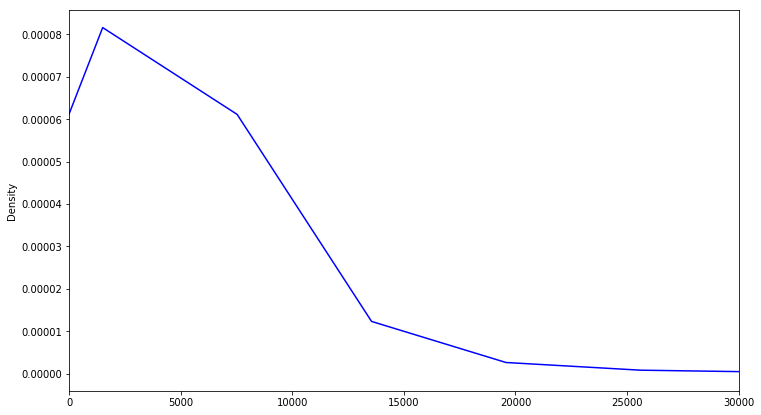

In [329]:
dataset_pandas['MonthlyIncome'].plot(kind = 'kde' , style = 'b' ,figsize=(12,7));
plt.xlim([0,30000]);

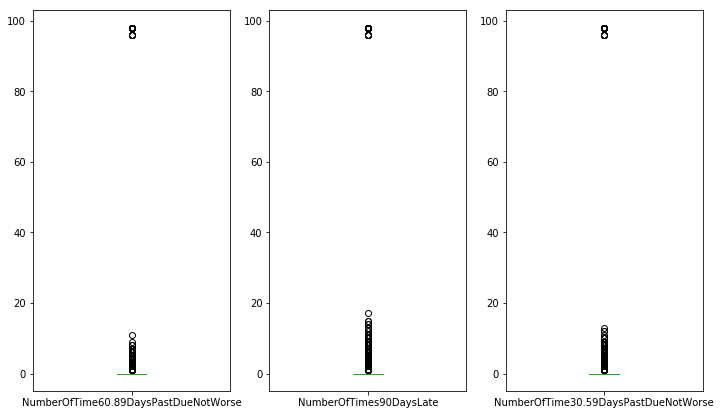

In [328]:
dataset_pandas[['NumberOfTime60.89DaysPastDueNotWorse','NumberOfTimes90DaysLate',
                'NumberOfTime30.59DaysPastDueNotWorse']].plot(kind='box',subplots=True,figsize=(12,7));

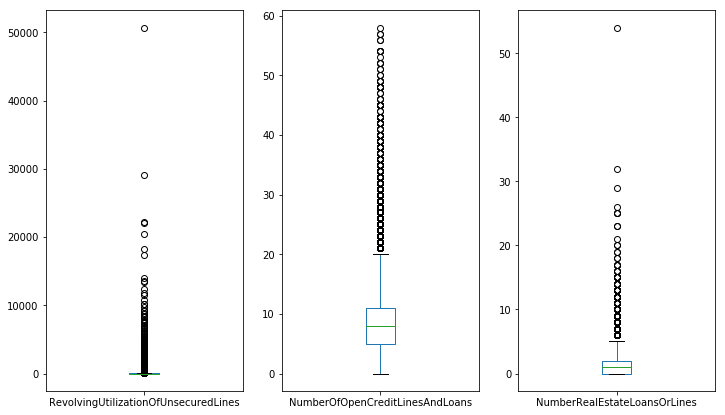

In [330]:
dataset_pandas[['RevolvingUtilizationOfUnsecuredLines','NumberOfOpenCreditLinesAndLoans',
                'NumberRealEstateLoansOrLines']].plot(kind='box',subplots=True,figsize=(12,7));

In [47]:
#Establecemos la semilla aleatoria
np.random.seed(1234)

In [115]:
# Utilizamos la funcion rand del paquete random dentro de numpy
#Genera valores aleatorios entre 0 y 1 siguiendo una distribucion uniforme para el tamaño establecido
#En este caso el tamaño es el numero de filas del dataset
#Nos quedaremos con los valores por debajo del 0.80, es decir, al ser una distribucion aleatoria
#con el 80% del dataset
msk = np.random.rand(dataset.shape[0]) < 0.8

In [116]:
#Del dataset nos quedamos con elementos que tienen true en msk es decir
#tenian un valor aleatorio entre 0 y 0.8
train = dataset[msk]

In [117]:
#Del dataset nos quedamos con elementos que tienen true en msk es decir
#tenian un valor aleatorio superior e iguala 0.8
test = dataset[~msk]

In [118]:
len(test)

29927

In [119]:
len(train)

120073

In [120]:
dataset.shape

(150000, 14)

In [128]:
# dividimos el dataset de train y de test en x(inputs) e y (variable a predecir)
X_train = train[0:,2:]
Y_train = train[:,1:2]
X_test = test[:,2:]
Y_test = test[:,1:2]

Observamos el grado de desbalanceo en el train y en el test. Como se puede apreciar hay 14 veces mas observaciones con con seriosdelinquency igual a cero que con uno

In [247]:
#Test
np.unique(Y_test,return_counts=True)[1][0]/np.unique(Y_test,return_counts=True)[1][1]

13.911310413552567

In [248]:
#Train
np.unique(Y_train,return_counts=True)[1][0]/np.unique(Y_train,return_counts=True)[1][1]

13.973562788377603

A continuación vamos a estimar el modelo. Los modelos en Keras se definen como una secuencia de capas, por lo que creamos un modelo secuencial y agregamos capas una a una hasta que estamos satisfechos con nuestra topología de red.

Es primordial asegurarse de que la capa de entrada tenga la cantidad correcta de entradas. Para ello, especificaremos en el argumento *input_dim* que queremos establecerlo en 12, puesto que en nuestro caso tenemos 12 variables de entrada.

La pregunta que a continuación nos planteamos es la siguiente: *¿Cómo sabemos la cantidad de capas y sus tipos?*

Aunque hay heurísticas que podemos usar, a menudo la mejor estructura de red se encuentra a través de un proceso de experimentación de prueba y error. En este ejemplo didáctico, vamos a utilizar una estructura de red completamente conectada con tres capas.

Las capas completamente conectadas se definen usando la clase *Dense*. Podemos especificar el número de neuronas en la capa como primer argumento, el método de inicialización como el segundo argumento como *init* y especificar la función de activación con el argumento *activation*.

Segundo argumento, inicializar los pesos. Lo haremos en un número aleatorio generado a partir de una distribución uniforme (*'uniform'*) entre 0 y 0.05 (inicialización de peso uniforme predeterminada en Keras y, por tanto, no tenemos que poner *init='uniform'*). Si quieramos cambiar otra alternativa también tradicional sería  establecer *init* = *'normal'* para generar números aleatorios siguiendo una distribución gaussiana.

Tercer argumento,  función de activación. Utilizaremos la función del rectificador (*'relu'*) en las tres primeras capas y la función sigmoidea en la capa de salida. Aplicamos la sigmoide en la capa de salida para asegurar que nuestra salida de red esté entre 0 y 1 y se facilite la asignación a la clase 1 o la clase 0. 

Las capas las vamos agregando una a una con .add, quedándonos un modelo conuna primera capa que tiene 128 neuronas y espera 12 variables de entrada, una segunda capa oculta que tiene 60 neuronas, una tercera capa oculta con 20 neuronas y la tercera capa o capa de salida que tiene 1 neurona para predecir la clase (aparición de diabetes o no).

In [582]:
# Estimamos el modelo con 3 capas
model = Sequential()
model.add(Dense(50, input_dim=12, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Ahora que el modelo está definido, podemos compilarlo.

La compilación del modelo usa las librerías numéricas eficientes conocidas como *back-end*, como Theano o TensorFlow. El back-end elige automáticamente la mejor forma de representar la red para entrenar y hacer predicciones para ejecutar en el hardware o incluso en distribuido.

Debemos especificar algunas propiedades adicionales requeridas al entrenar la red. Una de estas propiedades es la función de coste que se utilizará para evaluar un conjunto de ponderaciones, el optimizador utilizado para buscar diferentes ponderaciones para la red y cualquier métrica opcional que nos gustaría recopilar e informar durante el entrenamiento (accuracy, precision... medidas de la matriz de confusión).

En este caso, usaremos la función de coste logarítmica, que para un problema de clasificación binaria se define en Keras como "binary_crossentropy". También usaremos el algoritmo eficiente de descenso de gradiente "adam" (opción por defecto de Keras). 

Finalmente, debido a que es un problema de clasificación, pediremos al al modelo que recoja e informe sobre el accuracy.

In [583]:
# compilamos el modelo utilizando la funcion de coste logaritmica y el algoritmo de descenso de gradiente "adam".
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Vamos a proceder a pasar por el modelo nuestros datos para ver como se comporta. Para entrenar o ajustar nuestro modelo en nuestros datos cargados tenemos que llamar a la función fit () en el modelo.

El proceso de capacitación se ejecutará para un número fijo de iteraciones a través del conjunto de datos llamado *epochs*, que debemos especificar utilizando el argumento *nepochs*. También podemos establecer el número de instancias que se evalúan antes de que se realice una actualización de los pesos en la red. Este número de instancias es lo que denominamos *batch size* y se establece con el argumento *batch_size*.

En este caso, estableceremos un número pequeño de epochs(20) y usaremos un *batch size* de 40. Esto se podría ajustar mediante prueba y error. El número total de iteraciones sería por tanto de 400 (40 * 10)

Class weight es la diferencia de pesos entre la variables binarias. Al ser una muestra desbalanceada, decidimos darle mas peso al resultado de 1: serious deliquency que a cero: no deliquency. En concreto la diferencia será de 8 a 1.

In [584]:
# Pasamos por el modelo nuestros datos X e Y. Epochs = nº de veces que se hace forward y backpropagation.
#Batch_size = división del dataset.

model.fit(X_train, Y_train, epochs=20, batch_size=80,class_weight = 
          {0 : 1.,1: 12})

Epoch 1/20
120073/120073 [==============================] - 4s 35us/step - loss: 12.6385 - acc: 0.7993
Epoch 2/20
120073/120073 [==============================] - 3s 22us/step - loss: 11.9888 - acc: 0.8792
Epoch 3/20
120073/120073 [==============================] - 3s 22us/step - loss: 11.0303 - acc: 0.8815
Epoch 4/20
120073/120073 [==============================] - 3s 25us/step - loss: 10.8830 - acc: 0.8925
Epoch 5/20
120073/120073 [==============================] - 3s 28us/step - loss: 10.8660 - acc: 0.8766
Epoch 6/20
120073/120073 [==============================] - 5s 38us/step - loss: 10.8570 - acc: 0.8929
Epoch 7/20
120073/120073 [==============================] - 3s 28us/step - loss: 10.8486 - acc: 0.9081
Epoch 8/20
120073/120073 [==============================] - 3s 24us/step - loss: 10.8563 - acc: 0.9211
Epoch 9/20
120073/120073 [==============================] - 4s 30us/step - loss: 10.8421 - acc: 0.9232
Epoch 10/20
120073/120073 [==============================] - 3s 23us/step

In [ ]:
#model.fit(X_train, Y_train, epochs=10, batch_size=40,class_weight = 
          #{0 : 1.,1: 8})

Tras entrenar la red neuronal en el conjunto de datos, podemos evaluar el rendimiento de la red. Esto nos mostrará lo sencillo que es ver el rendimiento del modelo en los datos. Es preciso destacar que aunque por simplicidad hayamos entrenado el algoritmo con todo el conjunto de datos, lo ideal sería separar la muestra en train y test para evaluar los resultados de forma correcta.

Para evaluar el modelo en el conjunto de datos, utilizaremos la función *evaluate()*, lo que generará una predicción para cada par de entrada y salida y recopilará scores, incluido el coste promedio y cualquier métrica que se haya configurado previamente.

In [585]:
# evaluamos el modelo en el test y obtenemos el resultado
scores = model.evaluate(X_test,Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

29927/29927 [==============================] - 2s 64us/step

acc: 84.53%


Podemos observar que hemos obtenido un 92,48% de accuracy en la muestra de validación

In [586]:
# Si quisieramos ver las predicciones sobre el conjunto de datos que tenemos:
predictions = model.predict(X_test)
# redondeamos para que se quede en 1 o 0.
Predictions_rounded = [round(x[0]) for x in predictions]

In [445]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_61 (Dense)             (None, 80)                10320     
_________________________________________________________________
dense_62 (Dense)             (None, 20)                1620      
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 21        
Total params: 13,625
Trainable params: 13,625
Non-trainable params: 0
_________________________________________________________________
None


Comprobamos el balanceo de las variables

In [587]:
tp,fn,fp,tn  = metrics.confusion_matrix(Y_test,Predictions_rounded,labels=[1,0]).ravel()

In [588]:
tp,fn,fp,tn

(311, 1696, 2935, 24985)

In [589]:
sensitivity = tp/(tp+fn)
sensitivity

0.15495764823119082

In [590]:
specifity = tn/(fp+tn)
specifity

0.894878223495702

In [295]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [591]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test,Predictions_rounded)
    roc_auc[i] = auc(fpr[i], tpr[i])

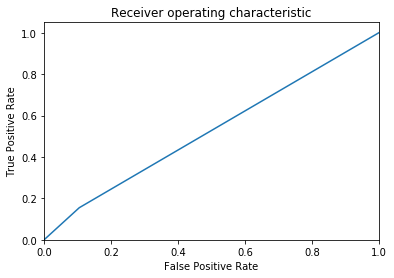

In [592]:
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

En conclusión se puede observar como una red neuronal presenta una precisión muy alto para los que no han sufrido deliquency pero es muy mala para para predecir los casos de deliquency. Para predecir esos valores, tiene que cometer muchos errores con respecto a los que no lo han cometido

In [593]:
print(roc_auc_score(Y_test,Predictions_rounded))

0.5249179358634464


Con esto finalizamos el primer ejemplo de introducción a la librería Keras. En el siguiente ejemplo profundizaremos un poco en Keras y crearemos una *Convolutional Neural Network* que han demostrado mejores resultados a la hora de enfrentar problemas de clasificación con imágenes como input.

[Siguiente : Ejemplo 2 - Redes Neuronales Convolucionales. Procesando imágenes](../Trabajo Redes Neuronales/Ejemplo_2_CNNs.ipynb)